In [1]:
from __future__ import annotations

%load_ext jupyter_black

In [2]:
import os

import mesoscaler as ms

Mesoscale(size=6):
-       scale: [ 1.00  7.52  9.43 11.69 13.52 14.78]
- levels[hPa]: [1013.25  925.00  850.00  700.00  500.00  300.00]
-  extent[km]: 
[[ -200.00  -175.00   200.00   175.00]
 [-1504.23 -1316.20  1504.23  1316.20]
 [-1885.10 -1649.47  1885.10  1649.47]
 [-2338.60 -2046.27  2338.60  2046.27]
 [-2704.87 -2366.76  2704.87  2366.76]
 [-2956.21 -2586.68  2956.21  2586.68]]


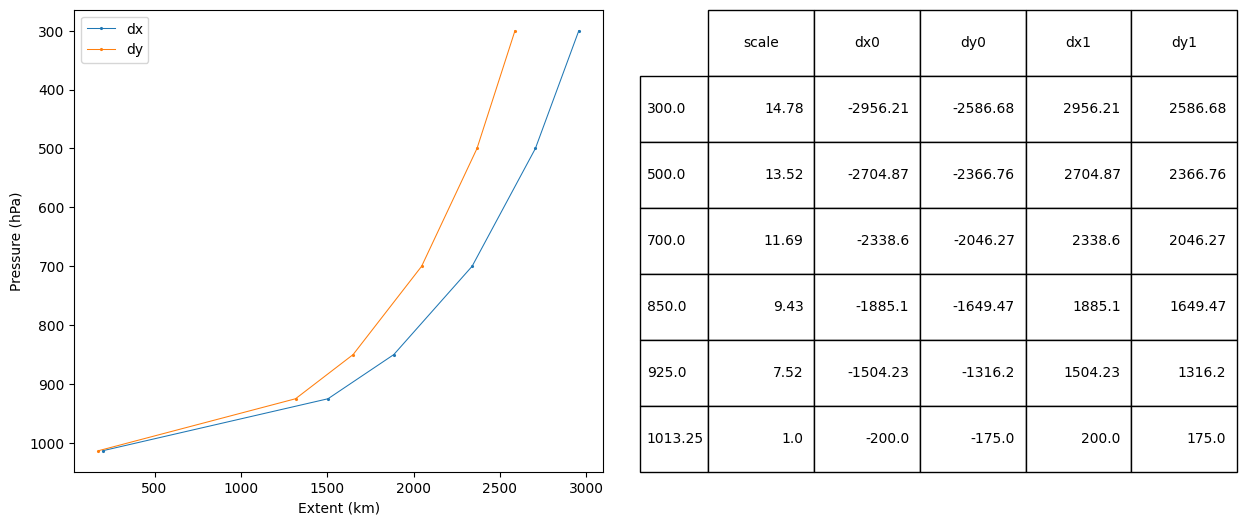

In [3]:
import matplotlib.pyplot as plt

scale = ms.Mesoscale.arange(200, 175)
print(scale)
scale.plot.table()
plt.show()

In [23]:
import numpy as np
rate = 12
x = np.array([1013.25, 925.00, 850.00, 700.00, 500.00, 300.00])  # hPa
x = np.log(x)[::-1]  # reversed
x = (x - x.min()) / (x.max() - x.min())  # normalized
x *= rate # scaled
x += 1 # shifted

print(x)


[ 1.          6.03633821  9.35368938 11.26791472 12.10158394 13.        ]


In [30]:
urma_grid_resolution = 2.5  # km
dx, dy = 200, 175  # km
width, height = dx / urma_grid_resolution, dy / urma_grid_resolution # (80, 70)

```python
>>> import numpy as np
>>> rate = 12
>>> x = np.array([1013.25, 925.00, 850.00, 700.00, 500.00, 300.00])  # hPa
>>> x = np.log(x)[::-1]  # reversed
>>> x = (x - x.min()) / (x.max() - x.min())  # normalized
>>> x *= rate # scaled
>>> x += 1 # shifted
>>> x
array([ 1.        ,  6.03633821,  9.35368938, 11.26791472, 12.10158394,
       13.        ])
```

In [4]:
from mesoscaler.enums import (
    # - ERA5
    GEOPOTENTIAL,
    SPECIFIC_HUMIDITY,
    TEMPERATURE,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
    # - URMA
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
    SURFACE_PRESSURE,
)

_test_data = "../tests/data"

urma_store = os.path.join(_test_data, "urma.zarr")
era5_store = os.path.join(_test_data, "era5.zarr")
# define the variables and levels

era5_dvars = [
    GEOPOTENTIAL,
    TEMPERATURE,
    SPECIFIC_HUMIDITY,
    U_COMPONENT_OF_WIND,
    V_COMPONENT_OF_WIND,
]
urma_dvars = [
    SURFACE_PRESSURE,
    TEMPERATURE_2M,
    SPECIFIC_HUMIDITY_2M,
    U_WIND_COMPONENT_10M,
    V_WIND_COMPONENT_10M,
]
assert len(era5_dvars) == len(urma_dvars), "vard must be the same length in order to be resampled"

era5 = ms.DependentDataset.from_zarr(era5_store, era5_dvars)  # get datasets
urma = ms.DependentDataset.from_zarr(urma_store, urma_dvars)  # get datasets

In [5]:
dsets = ms.DatasetSequence([era5, urma])  # create a dataset sequence

dsets

DatasetSequence(size=2)[
<xarray.DependentDataset>
Dimensions:              (T: 2, Z: 37, Y: 721, X: 1440)
Coordinates:
    latitude             (Y, X) float32 90.0 90.0 90.0 ... -90.0 -90.0 -90.0
  * vertical             (Z) int64 1 2 3 5 7 10 20 ... 875 900 925 950 975 1000
    longitude            (Y, X) float32 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time                 (T) datetime64[ns] 2019-01-02 2019-01-02T01:00:00
Dimensions without coordinates: T, Z, Y, X
Data variables:
    geopotential         (T, Z, Y, X) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    specific_humidity    (T, Z, Y, X) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    temperature          (T, Z, Y, X) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    u_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind  (T, Z, Y, X) float32 dask.array<chunksize=(1, 37, 721, 1440), meta=np.ndarray>
Attributes:
    depends:  Dependencies(ERA5)
<xarray.DependentDataset>
Dimensions:               (Y: 1597, X: 2345, T: 2, Z: 1)
Coordinates:
    latitude              (Y, X) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude             (Y, X) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
  * time                  (T) datetime64[ns] 2019-01-02 2019-01-02T01:00:00
  * vertical              (Z) float64 1.013e+03
Dimensions without coordinates: Y, X, T, Z
Data variables:
    specific_humidity_2m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    surface_pressure      (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    temperature_2m        (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    u_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
    v_wind_component_10m  (T, Z, Y, X) float32 dask.array<chunksize=(1, 1, 1597, 2345), meta=np.ndarray>
Attributes:
    depends:  Dependencies(URMA)
]

In [6]:
domain = scale.get_domain(dsets)
domain

Domain:
-  bbox: BoundingBox(west=-138.37319928236172, south=19.228975999999996, east=-59.042147941577866, north=57.08856116148375)
-  time: ['2019-01-02T00:00:00.000000000' '2019-01-02T01:00:00.000000000']
- scale: 
  Mesoscale(size=6):
  -       scale: [ 1.00  7.52  9.43 11.69 13.52 14.78]
  - levels[hPa]: [1013.25  925.00  850.00  700.00  500.00  300.00]
  -  extent[km]: 
  [[ -200.00  -175.00   200.00   175.00]
   [-1504.23 -1316.20  1504.23  1316.20]
   [-1885.10 -1649.47  1885.10  1649.47]
   [-2338.60 -2046.27  2338.60  2046.27]
   [-2704.87 -2366.76  2704.87  2366.76]
   [-2956.21 -2586.68  2956.21  2586.68]]

In [7]:
sampler = ms.AreaOfInterestSampler(domain, aoi=(-120, 30, -70, 25))
sampler

AreaOfInterestSampler[
((-120.0, 30.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-120.0, 28.75), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-120.0, 27.5), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-120.0, 26.25), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-120.0, 25.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-107.5, 30.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-107.5, 28.75), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-107.5, 27.5), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-107.5, 26.25), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-107.5, 25.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-95.0, 30.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-95.0, 28.75), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-95.0, 27.5), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-95.0, 26.25), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
((-95.0, 25.0), 2019-01-02T00:00:00Z:2019-01-02T01:00:00Z:None)
(

In [8]:
resampler = scale.resample([era5, urma])
resampler

In [9]:
for (lon, lat), time in sampler:
    x = resampler.__call__(lon, lat, time)
    print(x.shape)
    break

(5, 2, 6, 80, 80)


In [10]:
x[:, :, 0]

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., 